In [4]:
import sys
import os

# Add the Code folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Code')))

from CLfitter import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


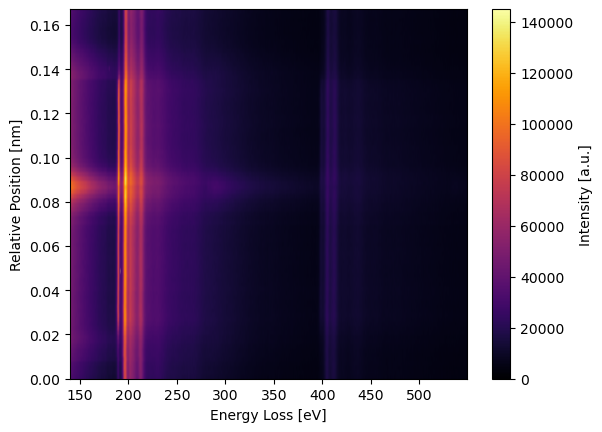

In [5]:
path_to_data = r"..\Data\008_core_loss_line_020evpx_1mm.dm3"


params = {  'E_0'   : 300e3,  # eV
            'beta'  : 1e-3,    # eV
        }

clfit = CoreLossFitter(**params)
clfit.read_from_dm3(path_to_data, EELS_index = 0)
clfit.plot()

c:\Users\bartv\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


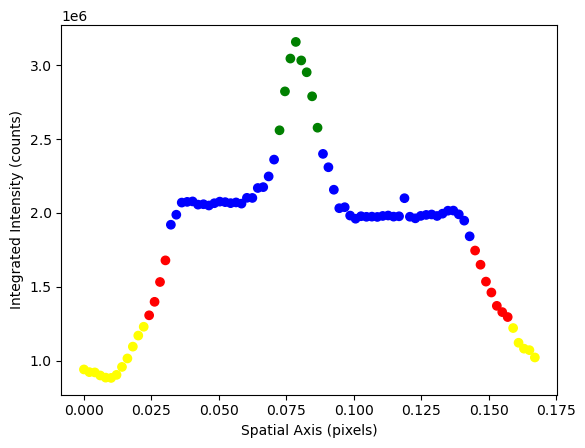

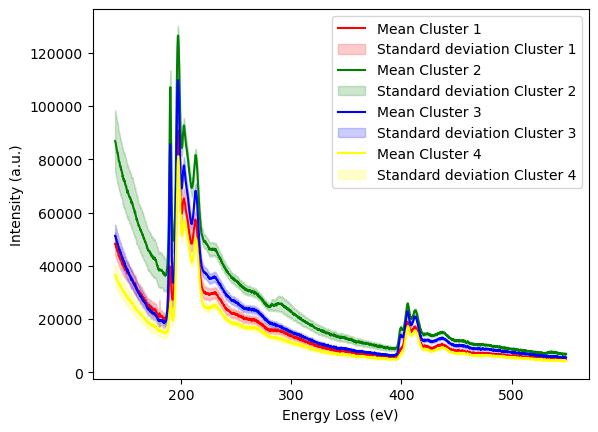

In [15]:
total_integrated_intensity = np.sum(clfit.core_loss_data[:340,(clfit.energy_loss_axis<195)&(clfit.energy_loss_axis>185)],
                                     axis=1)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(total_integrated_intensity.reshape(-1, 1))

colors = ['red', 'green', 'blue', 'yellow']
plt.scatter(clfit.spatial_axis[:340], total_integrated_intensity, c=[colors[i] for i in clusters])
plt.xlabel('Spatial Axis (pixels)')
plt.ylabel('Integrated Intensity (counts)')
plt.show()
clustered_spectra_mean = np.zeros((len(clfit.energy_loss_axis), n_clusters))
clustered_spectra_std = np.zeros((len(clfit.energy_loss_axis), n_clusters))
for i in range(n_clusters):
    clustered_spectra_mean[:, i] = np.mean(clfit.core_loss_data[:340][clusters == i], axis=0)
    clustered_spectra_std[:, i] = np.std(clfit.core_loss_data[:340][clusters == i], axis=0) 
    plt.plot(clfit.energy_loss_axis, clustered_spectra_mean[:, i], c=colors[i], label=f'Mean Cluster {i+1}')
    plt.fill_between(clfit.energy_loss_axis, clustered_spectra_mean[:, i] - clustered_spectra_std[:, i], 
                     clustered_spectra_mean[:, i] + clustered_spectra_std[:, i], alpha=0.2, color=colors[i], 
                     label=f'Standard deviation Cluster {i+1}')
plt.xlabel('Energy Loss (eV)')
plt.ylabel('Intensity (a.u.)')
plt.legend()


2048 4


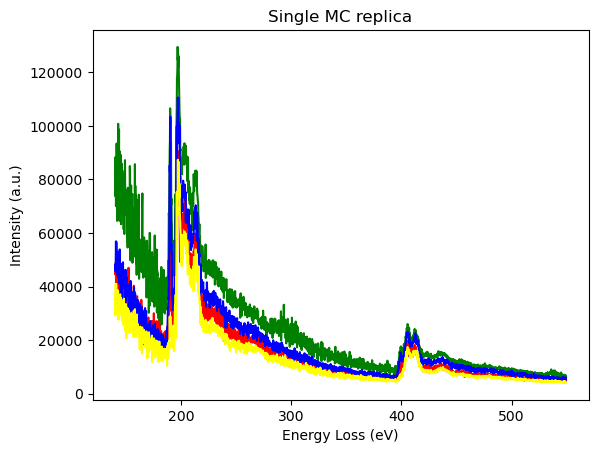

In [20]:
representative_spectrum  = np.zeros((len(clfit.energy_loss_axis), n_clusters))
# np.random.seed(1000)
print(len(clfit.energy_loss_axis), n_clusters)
for i in range(n_clusters):
    # representative_spectrum[:, i] = clustered_spectra_mean[:,i]
    representative_spectrum[:, i] += np.random.normal(clustered_spectra_mean[:,i],clustered_spectra_std[:, i] )

    plt.plot(clfit.energy_loss_axis, representative_spectrum[:, i], c=colors[i])
plt.xlabel('Energy Loss (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('Single MC replica')
plt.show()

Text(0, 0.5, 'Intensity (a.u.)')

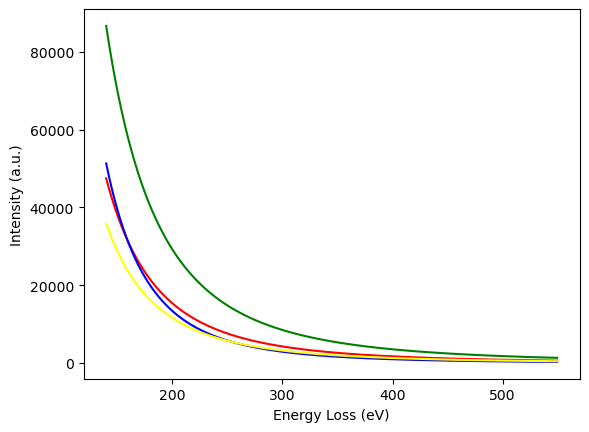

In [23]:
from scipy.optimize import curve_fit
def func(x,a,r):
    return a*x**-r

for i in range(n_clusters):
    # representative_spectrum[:, i] = clustered_spectra_mean[:,i]
    popt,pcov = curve_fit(func, clfit.energy_loss_axis[:200], representative_spectrum[:200, i])

    plt.plot(clfit.energy_loss_axis, func(clfit.energy_loss_axis, *popt), c=colors[i])
plt.xlabel('Energy Loss (eV)')
plt.ylabel('Intensity (a.u.)')
